# Large Scale Data Processing

In [ ]:
import torch
import numpy as np
import torchvision
from torch.utils.data import Dataset, DataLoader
from tqdm import tqdm
import scipy.io
import numpy as np
# Set the random seed
seed = 42
torch.manual_seed(seed)

In [ ]:
# load MNIST
train_dataset = torchvision.datasets.FashionMNIST(root='./data', train=True, transform=torchvision.transforms.ToTensor(), download=True)
test_dataset = torchvision.datasets.FashionMNIST(root='./data', train=False, transform=torchvision.transforms.ToTensor(), download=True)
# dataloader
train_loader = DataLoader(dataset=train_dataset, batch_size=100, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=100, shuffle=False)

100%|██████████| 26421880/26421880 [00:04<00:00, 5808084.94it/s] 


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 298351.97it/s]


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:04<00:00, 1042153.07it/s]


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 9283008.17it/s]


Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



In [ ]:
import numpy as np
import torchvision
from torch.utils.data import DataLoader

# Define your data loaders as you have in your code
train_dataset = torchvision.datasets.FashionMNIST(root='./data', train=True, transform=torchvision.transforms.ToTensor(), download=True)
test_dataset = torchvision.datasets.FashionMNIST(root='./data', train=False, transform=torchvision.transforms.ToTensor(), download=True)
train_loader = DataLoader(dataset=train_dataset, batch_size=100, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=100, shuffle=False)

# Initialize lists to store the images and labels
train_images = []
train_labels = []
test_images = []
test_labels = []

# Iterate through the training data and extract images and labels
for images, labels in train_loader:
    train_images.append(images.numpy())
    train_labels.append(labels.numpy())

# Iterate through the testing data and extract images and labels
for images, labels in test_loader:
    test_images.append(images.numpy())
    test_labels.append(labels.numpy())

# Convert the lists to NumPy arrays
train_images = np.concatenate(train_images, axis=0)
train_labels = np.concatenate(train_labels, axis=0)
test_images = np.concatenate(test_images, axis=0)
test_labels = np.concatenate(test_labels, axis=0)

In [ ]:
# define model
class Model(torch.nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        # 28 FC layers with output size 128
        self.fc_row_1 = torch.nn.ModuleList([torch.nn.Linear(28, 28) for i in range(28)])
        # 28 FC layers with output size 1
        self.fc_row_2 = torch.nn.ModuleList([torch.nn.Linear(28, 1) for i in range(28)])
        self.linear = torch.nn.Linear(28, 10) # 28 for column and 28 for row
        self.relu = torch.nn.ReLU()
    def forward(self, x):
        x = x.view(-1, 28, 28)
        # pass each row to each linear layer and get 28 outputs
        row = [self.relu(fc(x[:, :, i])) for i, fc in enumerate(self.fc_row_1)]
        row = [self.relu(fc(row[i])) for i, fc in enumerate(self.fc_row_2)]
        # pass each column to each linear layer and get 28 outputs
        # concatenate row and column outputs
        row = torch.cat(row, dim=1)
        x = self.linear(row)
        return x

In [ ]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
model = Model().to(device)
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [ ]:
# train
for epoch in range(10):
    model.train()
    train_loss = 0.0
    train_acc = 0.0
    for data, target in tqdm(train_loader):
        data = data.to(device)
        target = target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * data.size(0)
        _, pred = torch.max(output, 1)
        train_acc += (pred == target).sum().item()
    train_loss = train_loss / len(train_loader.dataset)
    train_acc = train_acc / len(train_loader.dataset)
    print('Epoch: {}, Train Loss: {:.4f}, Train Acc: {:.4f}'.format(epoch+1, train_loss, train_acc))

100%|██████████| 600/600 [00:30<00:00, 19.92it/s]


Epoch: 1, Train Loss: 0.9696, Train Acc: 0.6703


100%|██████████| 600/600 [00:21<00:00, 28.36it/s]


Epoch: 2, Train Loss: 0.5677, Train Acc: 0.7997


100%|██████████| 600/600 [00:19<00:00, 31.33it/s]


Epoch: 3, Train Loss: 0.5156, Train Acc: 0.8195


100%|██████████| 600/600 [00:20<00:00, 29.91it/s]


Epoch: 4, Train Loss: 0.4885, Train Acc: 0.8296


100%|██████████| 600/600 [00:19<00:00, 31.51it/s]


Epoch: 5, Train Loss: 0.4721, Train Acc: 0.8337


100%|██████████| 600/600 [00:19<00:00, 30.05it/s]


Epoch: 6, Train Loss: 0.4588, Train Acc: 0.8400


100%|██████████| 600/600 [00:18<00:00, 31.73it/s]


Epoch: 7, Train Loss: 0.4482, Train Acc: 0.8422


100%|██████████| 600/600 [00:19<00:00, 30.32it/s]


Epoch: 8, Train Loss: 0.4395, Train Acc: 0.8464


100%|██████████| 600/600 [00:19<00:00, 31.07it/s]


Epoch: 9, Train Loss: 0.4315, Train Acc: 0.8480


100%|██████████| 600/600 [00:19<00:00, 30.63it/s]

Epoch: 10, Train Loss: 0.4248, Train Acc: 0.8495


In [ ]:
# test
model.eval()
test_loss = 0.0
test_acc = 0.0
for data, target in tqdm(test_loader):
    data = data.to(device)
    target = target.to(device)
    output = model(data)
    loss = criterion(output, target)
    test_loss += loss.item() * data.size(0)
    _, pred = torch.max(output, 1)
    test_acc += (pred == target).sum().item()
test_loss = test_loss / len(test_loader.dataset)
test_acc = test_acc / len(test_loader.dataset)
print('Test Loss: {:.4f}, Test Acc: {:.4f}'.format(test_loss, test_acc))

100%|██████████| 100/100 [00:01<00:00, 58.82it/s]

Test Loss: 0.4611, Test Acc: 0.8344


100%|██████████| 100/100 [00:01<00:00, 50.81it/s]


Test Loss: 0.4467, Test Acc: 0.8395


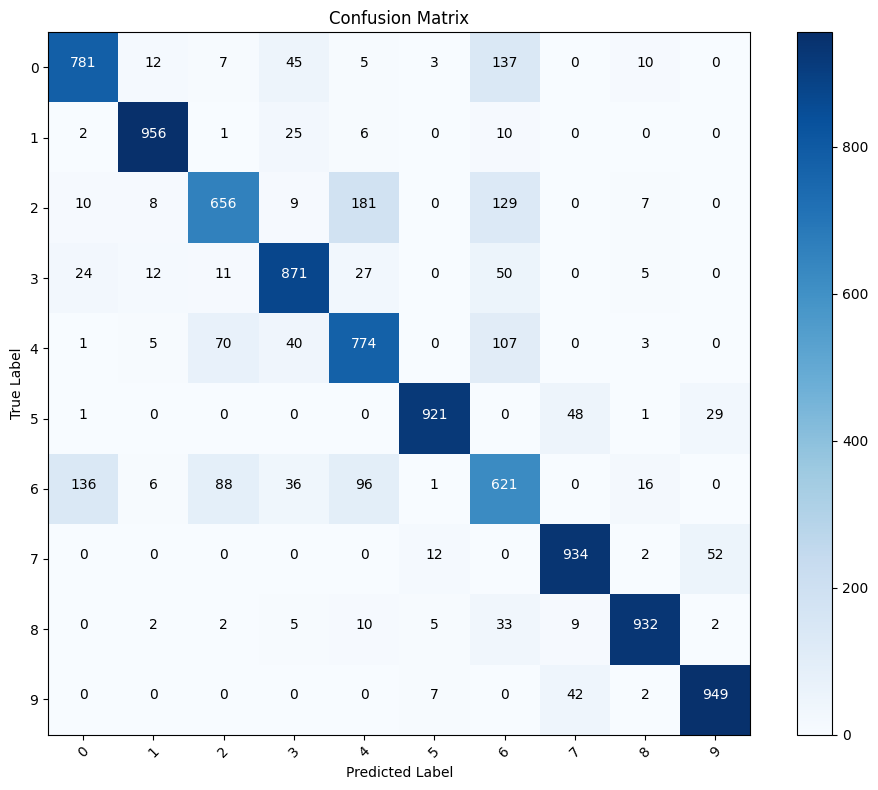

Total errors: 1605, Error rate: 16.05%


In [ ]:
import torch
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import itertools  # Added this line to import itertools

# MNIST class names
mnist_classes = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

# Test the model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.eval()
test_loss = 0.0
test_acc = 0.0
targets = []
predictions = []

for data, target in tqdm(test_loader):
    data = data.to(device)
    target = target.to(device)
    output = model(data)
    loss = criterion(output, target)
    test_loss += loss.item() * data.size(0)
    _, pred = torch.max(output, 1)
    test_acc += (pred == target).sum().item()
    targets.extend(target.cpu().numpy())
    predictions.extend(pred.cpu().numpy())

test_loss = test_loss / len(test_loader.dataset)
test_acc = test_acc / len(test_loader.dataset)
print('Test Loss: {:.4f}, Test Acc: {:.4f}'.format(test_loss, test_acc))

# Plot confusion matrix
cm = confusion_matrix(targets, predictions)
plt.figure(figsize=(10, 8))
plt.imshow(cm, cmap='Blues', interpolation='nearest')
plt.title('Confusion Matrix')
plt.colorbar()

# Add class names and numbers to the confusion matrix
tick_marks = np.arange(len(mnist_classes))
plt.xticks(tick_marks, mnist_classes, rotation=45)
plt.yticks(tick_marks, mnist_classes)

# Add values to the confusion matrix
thresh = cm.max() / 2
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

# Calculate and print degrees of error
total = sum(sum(cm))
errors = total - np.diag(cm).sum()
error_rate = errors / total
print(f'Total errors: {errors}, Error rate: {error_rate * 100:.2f}%')